In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [266]:
!kaggle datasets download juice0lover/users-vs-bots-classification

Dataset URL: https://www.kaggle.com/datasets/juice0lover/users-vs-bots-classification
License(s): MIT
users-vs-bots-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [267]:
!tar -xf users-vs-bots-classification.zip

In [268]:
df = pd.read_csv('bots_vs_users.csv')

In [269]:
df.head(10)

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
8,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
9,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [271]:
df.shape

(5874, 60)

In [272]:
df.duplicated().sum()

2616

In [273]:
df.drop_duplicates()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
27,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
53,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
82,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
84,1.0,Unknown,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Moscow,1.0,0.0,1.0,Unknown


In [274]:
df.dtypes

has_domain                     object
has_birth_date                 object
has_photo                      object
can_post_on_wall               object
can_send_message               object
has_website                    object
gender                         object
has_short_name                 object
has_first_name                 object
has_last_name                  object
access_to_closed_profile       object
is_profile_closed              object
target                          int64
has_nickname                   object
has_maiden_name                object
has_mobile                     object
all_posts_visible              object
audio_available                object
has_interests                  object
has_books                      object
has_tv                         object
has_quotes                     object
has_about                      object
has_games                      object
has_movies                     object
has_activities                 object
has_music   

In [275]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,5874.0,0.500000,0.500043,0.0,0.000,0.50,1.000,1.00
posts_count,1391.0,18.629044,4.231994,1.0,20.000,20.00,20.000,20.00
avg_likes,1391.0,19.552487,41.954881,0.0,0.400,7.60,26.075,894.90
links_ratio,1391.0,0.156463,0.202730,0.0,0.000,0.10,0.200,1.00
hashtags_ratio,1391.0,0.143918,0.187085,0.0,0.000,0.05,0.200,1.00
avg_keywords,1391.0,7.730661,11.278711,0.0,1.100,3.40,7.850,61.60
avg_text_length,1391.0,544.752035,746.728130,0.0,86.600,267.80,616.850,5841.25
attachments_ratio,1391.0,0.895945,0.170084,0.0,0.850,0.95,1.000,1.00
avg_comments,1391.0,0.610812,2.461709,0.0,0.000,0.00,0.200,64.05
reposts_ratio,1391.0,0.433638,0.397830,0.0,0.050,0.30,0.900,1.00


In [276]:
df.isnull().sum()

has_domain                       0
has_birth_date                   0
has_photo                        0
can_post_on_wall                 0
can_send_message                 0
has_website                      0
gender                           0
has_short_name                   0
has_first_name                   0
has_last_name                    0
access_to_closed_profile         0
is_profile_closed                0
target                           0
has_nickname                     0
has_maiden_name                  0
has_mobile                       0
all_posts_visible                0
audio_available                  0
has_interests                    0
has_books                        0
has_tv                           0
has_quotes                       0
has_about                        0
has_games                        0
has_movies                       0
has_activities                   0
has_music                        0
can_add_as_friend                0
can_invite_to_group 

In [277]:
df['target'].value_counts()

target
1    2937
0    2937
Name: count, dtype: int64

In [278]:
df.isnull().sum()

has_domain                       0
has_birth_date                   0
has_photo                        0
can_post_on_wall                 0
can_send_message                 0
has_website                      0
gender                           0
has_short_name                   0
has_first_name                   0
has_last_name                    0
access_to_closed_profile         0
is_profile_closed                0
target                           0
has_nickname                     0
has_maiden_name                  0
has_mobile                       0
all_posts_visible                0
audio_available                  0
has_interests                    0
has_books                        0
has_tv                           0
has_quotes                       0
has_about                        0
has_games                        0
has_movies                       0
has_activities                   0
has_music                        0
can_add_as_friend                0
can_invite_to_group 

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [280]:
encoder = LabelEncoder()

In [281]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col]=encoder.fit_transform(df[col])

In [282]:
df.tail()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
5869,0,0,1,0,0,2,2,0,0,1,...,NaN,NaN,NaN,NaN,NaN,250,0,0,1,1
5870,0,1,1,0,0,2,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,250,0,1,0,1
5871,0,0,0,0,0,1,2,0,0,1,...,NaN,NaN,NaN,NaN,NaN,250,0,1,0,1
5872,0,0,1,0,0,1,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,181,0,0,1,1
5873,0,0,1,0,1,1,1,0,0,1,...,0.0,431.3,17.79,0.0,0.61,250,0,0,1,0


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   int32  
 1   has_birth_date              5874 non-null   int32  
 2   has_photo                   5874 non-null   int32  
 3   can_post_on_wall            5874 non-null   int32  
 4   can_send_message            5874 non-null   int32  
 5   has_website                 5874 non-null   int32  
 6   gender                      5874 non-null   int32  
 7   has_short_name              5874 non-null   int32  
 8   has_first_name              5874 non-null   int32  
 9   has_last_name               5874 non-null   int32  
 10  access_to_closed_profile    5874 non-null   int32  
 11  is_profile_closed           5874 non-null   int32  
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [284]:
for col in df.select_dtypes(include=[np.number]).columns:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

C:\Users\Jarrod\AppData\Local\Temp\ipykernel_20568\443502488.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [285]:
for col in df.select_dtypes(include=['number']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers.")
    else:
        print(f"{col}: No outliers.")

has_domain: 24 outliers.
has_birth_date: 856 outliers.
has_photo: No outliers.
can_post_on_wall: 251 outliers.
can_send_message: No outliers.
has_website: 1438 outliers.
gender: 1362 outliers.
has_short_name: 24 outliers.
has_first_name: 24 outliers.
has_last_name: 30 outliers.
access_to_closed_profile: 783 outliers.
is_profile_closed: 783 outliers.
target: No outliers.
has_nickname: No outliers.
has_maiden_name: No outliers.
has_mobile: No outliers.
all_posts_visible: No outliers.
audio_available: No outliers.
has_interests: 1273 outliers.
has_books: 1273 outliers.
has_tv: 1273 outliers.
has_quotes: 1273 outliers.
has_about: 1273 outliers.
has_games: 1273 outliers.
has_movies: 1273 outliers.
has_activities: 1273 outliers.
has_music: 1273 outliers.
can_add_as_friend: No outliers.
can_invite_to_group: No outliers.
subscribers_count: No outliers.
is_blacklisted: No outliers.
has_career: 1273 outliers.
has_military_service: 1273 outliers.
has_hometown: 1273 outliers.
marital_status: 1273 

In [286]:
df_cleaned = df.copy()

for col in df.select_dtypes(include=['number']).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

In [287]:
corr = df.corr(numeric_only=True)
print(corr)

                            has_domain  has_birth_date  has_photo  \
has_domain                    1.000000        0.155080   0.182939   
has_birth_date                0.155080        1.000000   0.228485   
has_photo                     0.182939        0.228485   1.000000   
can_post_on_wall              0.544464        0.102737   0.242853   
can_send_message              0.196184        0.161207   0.777511   
has_website                   0.149652        0.188468   0.456081   
gender                        0.258463        0.068394   0.129441   
has_short_name                1.000000        0.155080   0.182939   
has_first_name                1.000000        0.155080   0.182939   
has_last_name                 0.894336        0.137703   0.179269   
access_to_closed_profile      0.210110       -0.120826  -0.234614   
is_profile_closed             0.335192        0.199817   0.324449   
target                       -0.048038       -0.240285  -0.795321   
has_nickname                  0.07

<Axes: >

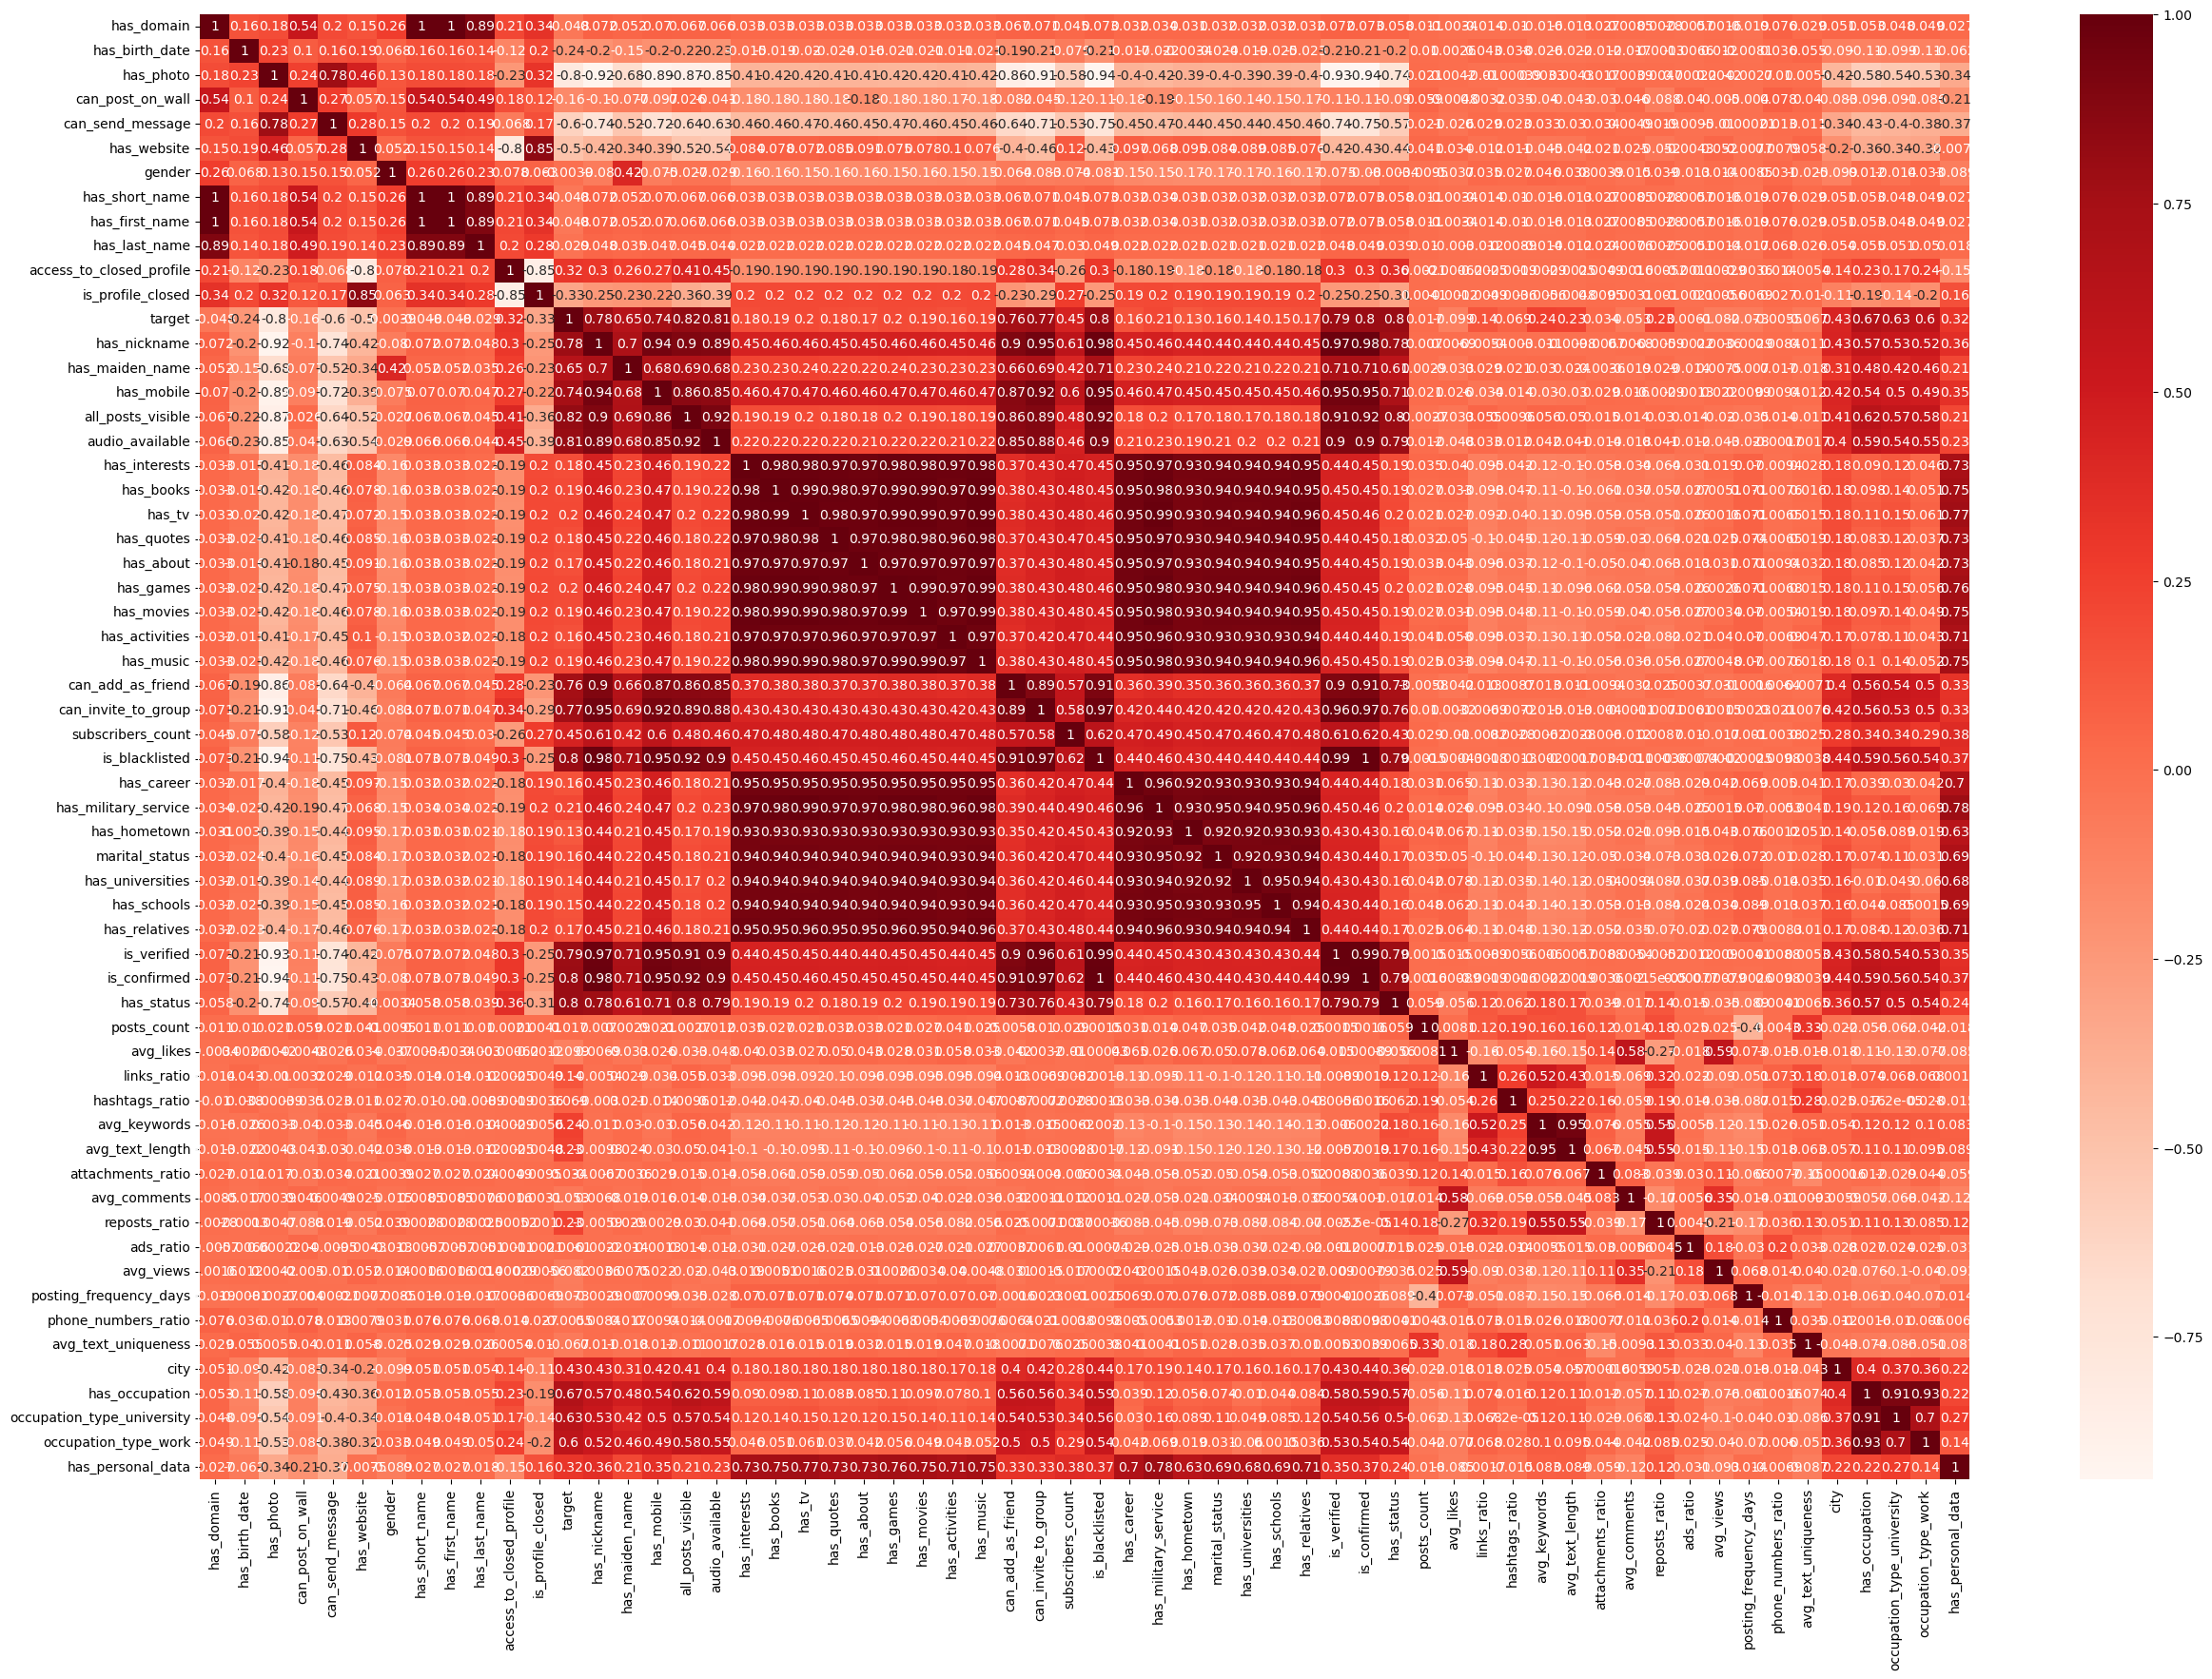

In [288]:
plt.subplots(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='Reds')

In [289]:
threshhold = 0.7 #only see correlations 0.7 and up
high_corr = corr.where(abs(corr) >= threshhold).stack() #absolute value of corr greater or equal to threshold
high_corr = high_corr[high_corr!=1] #clean it up (take away corr equal to 1)
print("Highly correlated features:")
print(high_corr)

Highly correlated features:
has_domain         has_last_name           0.894336
has_photo          can_send_message        0.777511
                   target                 -0.795321
                   has_nickname           -0.922965
                   has_mobile             -0.894766
                                             ...   
has_personal_data  has_movies              0.749903
                   has_activities          0.707095
                   has_music               0.751266
                   has_military_service    0.784235
                   has_relatives           0.712878
Length: 436, dtype: float64


In [290]:
x = df.drop(columns=['target'])
y = df['target']

In [291]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [293]:
rfc_model = RandomForestClassifier()

rfc_model.fit(x_train, y_train)

RandomForestClassifier()

In [294]:
predictions = rfc_model.predict(x_test)

In [295]:
predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [296]:
score = rfc_model.score(x_test,y_test)
print(score)

0.9761702127659575


In [297]:
testdata = x_test[:5]

In [298]:
y_test[:5]

5365    0
4325    0
199     1
3259    0
3493    0
Name: target, dtype: int64

In [299]:
rfc_model.predict(testdata)

array([0, 0, 1, 0, 0], dtype=int64)

In [300]:
train_score = rfc_model.score(x_train, y_train)
test_score = rfc_model.score(x_test, y_test)
print(f"Training: {train_score}")
print(f"Testing: {test_score}")

Training: 0.9938284741434348
Testing: 0.9761702127659575


In [301]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       574
           1       0.98      0.97      0.98       601

    accuracy                           0.98      1175
   macro avg       0.98      0.98      0.98      1175
weighted avg       0.98      0.98      0.98      1175



In [302]:
print(confusion_matrix(y_test, predictions))

[[562  12]
 [ 16 585]]


In [303]:
cm = confusion_matrix(y_test, predictions)

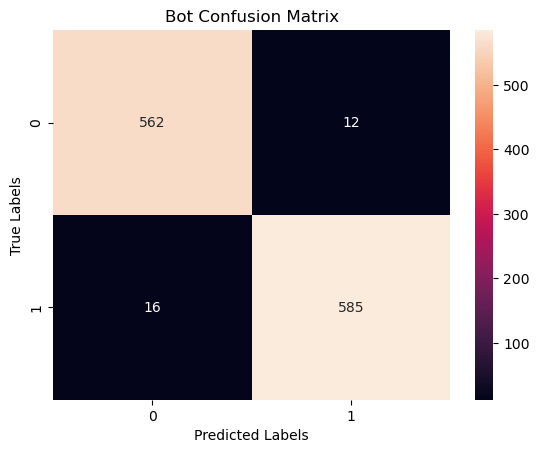

In [304]:
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Bot Confusion Matrix")
plt.show()

In [305]:
auc_score = roc_auc_score(y_test,predictions)
print(auc_score)

0.9762358902410037


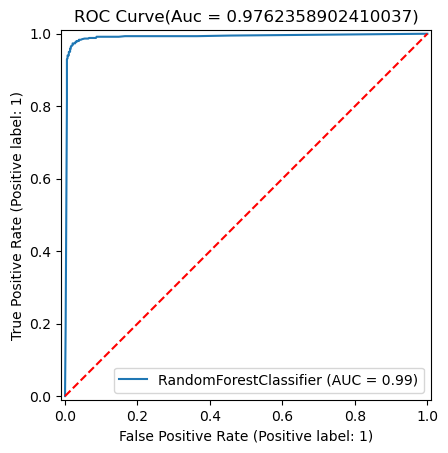

In [306]:
RocCurveDisplay.from_estimator(rfc_model, x_test, y_test)
plt.title(f"ROC Curve(Auc = {auc_score})")
plt.plot([0,1],[0,1],linestyle='--', color='red')
plt.show()

In [307]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
predictions_df.head(20)

,Actual,Predicted
5365,0,0
4325,0,0
199,1,1
3259,0,0
3493,0,0
2550,1,1
2764,1,1
5071,0,0
1212,1,1
4717,0,0


In [308]:
mae = mean_absolute_error(y_test, predictions)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

r2 = r2_score(y_test, predictions)

print("-" * 40)
print(f"Model: Random Forresest Classifier")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print("-" * 40)

----------------------------------------
Model: Random Forresest Classifier
Mean Absolute Error: 0.02
Mean Squared Error: 0.02
Root Mean Squared Error: 0.15
R² Score: 0.9046
----------------------------------------


# Random Forest Classifier Evaluation Report

## 1. Metric Interpreation

  **Mean Absolute Error**:      0.02     (The prediction differs from the true value by 0.02 units, indicating very low difference between the prediction and actual value).    
  **Mean Squared Error**:       0.02     (There are few and small deviations).                          
  **Root Mean Squared Error**:  0.15     (Indicates that mistakes are rare).      
  **R² Score**:                 0.9046   (The model explains **90.5%** of the variance, indicating a good fit). 

---

## 2. Confusion Matrix

- **True Negatives (TN)** = 562  
- **False Positives (FP)** = 12  
- **False Negatives (FN)** = 16  
- **True Positives (TP)** = 585  

- Very high TN and TP counts indicate the that model correctly labels almost all of the samples.  
- 28 samples were misclassifed out of 1 175.

---

## 3. Classification Report

| Class | Precision | Recall | F1-Score | Support |
| :---- | --------: | -----: | -------: | ------: |
| **0** |      0.97 |   0.98 |     0.98 |     574 |
| **1** |      0.98 |   0.97 |     0.98 |     601 |
| **Accuracy**    |           |        |     0.98 |   1 175 |
| **Macro avg**   |      0.98 |   0.98 |     0.98 |   1 175 |
| **Weighted avg**|      0.98 |   0.98 |     0.98 |   1 175 |

- **Precision** measures all predicted positives abd how accurate they are.”  
- **Recall** measures all actual positives and at what accuracy they are correct.”  


## 4. ROC Curve & AUC

- **AUC** = **0.9763**  
- The ROC curve ia hugging the top‐left corner which menas it can reliably differenciate between the two groups with little mistakes

- The model is really good at differenciating and correcly identifying from a bot vs not a bot 97 times out of 100.

---

## 5. Summary

- **Overall Accuracy**: 98 %  
- **Error rates** (MAE/MSE/RMSE) are extremely low
- **R²** of 0.9046 indicates the predictions are strongly aligned with the true values.  
- **ROC AUC** ≈ 0.98 confirms separability.

**Conclusion:** This Random Forest model demonstrates **outstanding** performance on the test set, with minimal misclassifications and has balanced/good metrics. The model performed very well.
